# Classification model using KNN

### 1. Import libraries

In [1]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial import distance
from sklearn import model_selection

### 2. Upload Clinic data

In [2]:
path ="../../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_multiclass_43.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:440  ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,40,41,42
0,2,0.022976,-0.965310,-1.238710,-0.980600,-1.223086,-0.737987,-0.887323,-0.675689,-0.028122,...,0.269411,-0.928447,-0.028176,0.111155,-0.279341,0.982918,-0.837571,-0.242425,-0.231228,0.046297
1,1,-0.151407,-0.861814,-0.970073,-0.646467,0.316065,0.509519,-0.708765,-0.422852,-0.436029,...,-0.513224,0.174376,0.292357,1.021724,1.833745,1.062946,0.196452,0.012724,-0.118445,0.739934
2,2,-0.068210,-1.288656,-1.196822,-0.350951,-0.518477,0.425649,-0.675744,0.307187,-0.279795,...,-0.291583,-0.543025,0.626299,0.957170,0.787820,0.170295,0.837617,-0.622304,-0.296431,-0.324272
3,0,-0.392235,-0.980445,-0.998436,-0.137651,0.285102,0.807072,-0.229599,0.203830,-0.296264,...,-0.536840,0.085051,0.212710,0.409950,1.947804,1.063359,-0.320035,-0.099703,-0.466355,0.805688
4,1,0.263224,0.673038,-1.974711,1.167531,-1.717946,1.500515,-1.023599,-0.077397,-0.726597,...,-0.237098,-0.970870,-1.468881,0.098396,1.068838,-0.387483,-0.999648,0.460180,-1.353426,-0.283846


In [3]:
Y = data.Target # Target column

X = data.iloc[:,1:439] # I selected all the columns by removing the Unnamed column (row id) and the Target column.


print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0    0.022976 -0.965310 -1.238710 -0.980600 -1.223086 -0.737987 -0.887323   
1   -0.151407 -0.861814 -0.970073 -0.646467  0.316065  0.509519 -0.708765   
2   -0.068210 -1.288656 -1.196822 -0.350951 -0.518477  0.425649 -0.675744   
3   -0.392235 -0.980445 -0.998436 -0.137651  0.285102  0.807072 -0.229599   
4    0.263224  0.673038 -1.974711  1.167531 -1.717946  1.500515 -1.023599   
..        ...       ...       ...       ...       ...       ...       ...   
176 -0.152809 -0.701253 -1.527834  0.090276 -0.717189  0.777892 -0.739791   
177 -0.569668 -0.485702 -1.285647 -0.943146 -0.530570 -0.204337 -0.205112   
178 -0.196661 -0.540016 -1.396883  0.021088 -1.211431  0.308100 -0.929356   
179 -0.007758 -0.201605 -1.513765 -0.789999 -0.198751  0.963480 -0.752608   
180  0.007880 -1.269928 -1.413523 -1.124486 -0.896541 -0.050075 -0.325665   

            7         8         9  ...        33        34        35  \
0  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125,stratify=Y)
yTrain=yTrain.to_numpy()
yTest=yTest.to_numpy()
print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Study the best value for K

In [5]:
neighbors = list(range(1,8))
cek = []
list_accuracy = []
best_acuracy = 0
best_k = 0
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(XTrain, yTrain).predict(XTest)
    if accuracy_score(yTest, pred) >= best_acuracy:
        best_k = k
        best_acuracy=accuracy_score(yTest, pred)
    list_accuracy.append(accuracy_score(yTest, pred))

print("Best accuracy is obtained with k = " + str(best_k)+ " and is: %.4f" % (best_acuracy))


Best accuracy is obtained with k = 5 and is: 0.2973


C:\Users\sandr\AppData\Local\Temp/ipykernel_15636/3738168230.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
C:\Users\sandr\AppData\Local\Temp/ipykernel_15636/3738168230.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(best_k, best_acuracy, 'ro', color ='g')


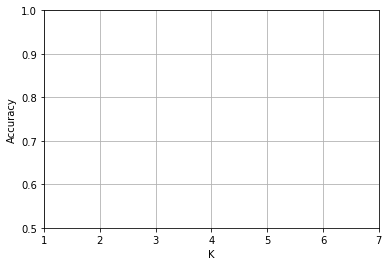

In [6]:
plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
# Green dot represent best K value
plt.plot(best_k, best_acuracy, 'ro', color ='g')
plt.axis([1, 7, 0.5, 1])
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.grid()
plt.show()

### 5. Best metric study (manhattan or euclidean)

In [7]:
from sklearn import neighbors
# Euclidean distance model
euclid_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.sqeuclidean)
euclid_model.fit(XTrain,yTrain) 

# Manhattan distance model
manhattan_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.cityblock) 
manhattan_model.fit(XTrain, yTrain)

KNeighborsClassifier(metric=<function cityblock at 0x00000284D63BC280>)

In [8]:
manhattan_predictions = manhattan_model.predict(XTest)
euclid_predictions = euclid_model.predict(XTest) 
df = pd.DataFrame({'actual': yTest, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,0,0,0
1,1,0,0
2,0,1,1
3,2,0,0
4,0,1,1


In [9]:
result1= model_selection.cross_val_score(euclid_model, XTrain, yTrain, cv=5, scoring='accuracy')
result2 = model_selection.cross_val_score(manhattan_model, XTrain, yTrain, cv=5, scoring='accuracy')
print("Best result of the cross validation of the model (euclidean) with the best paramters:" +str(np.mean(result1)))
print("Best result of the cross validation of the model (manhattan) with the best paramters:" +str(np.mean(result2)))

Best result of the cross validation of the model (euclidean) with the best paramters:0.5344827586206897
Best result of the cross validation of the model (manhattan) with the best paramters:0.5620689655172414


#### 6.1. Manhattan model

In [10]:
# Making predictions with the optimal model on the training dataset
yhatTrain = manhattan_model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [11]:
# Making predictions with the optimal model on the test dataset
mayhatTest = manhattan_model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (mayhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [12]:
print('Precisión final en el conjunto de datos de entrenamiento (manhattan): ' + str(contTrain/len(yTrain)))
print('Precisión final en el conjunto de datos de prueba (manhattan): ' + str(contTest/len(yTest)))

Precisión final en el conjunto de datos de entrenamiento (manhattan): 0.6736111111111112
Precisión final en el conjunto de datos de prueba (manhattan): 0.2702702702702703


In [13]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[57  4  6]
 [15  6  4]
 [14  4 34]]
Input data:  [1 0 2 0 2 2 0 0 2 0 2 0 1 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 1 1 2 2 2 2 0 1 2
 0 0 2 1 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 2 1 2 0 2 1 0 0 0 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 0 0 1 0 1 0 0 2 0 0 2 2 2 1 0 2 2
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 1 2 0 1]
Prediction:        [0 0 2 0 0 0 0 0 2 0 2 0 0 0 1 2 0 1 0 2 1 0 0 2 2 0 1 0 0 0 2 2 2 0 2 0 2
 0 0 0 0 2 2 1 2 0 0 0 2 0 0 0 0 0 0 2 0 2 0 2 0 0 2 0 2 0 0 2 2 2 1 1 0 0
 0 0 0 2 0 0 0 1 0 0 0 1 2 0 1 0 0 2 0 2 0 2 0 0 0 0 2 2 0 0 2 2 2 0 0 2 2
 2 2 0 1 0 0 0 0 0 0 0 1 0 0 2 0 2 0 0 0 2 0 1 1 0 0 0 2 2 0 2 0 0]


In [14]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.66      0.85      0.75        67
           1       0.43      0.24      0.31        25
           2       0.77      0.65      0.71        52

    accuracy                           0.67       144
   macro avg       0.62      0.58      0.59       144
weighted avg       0.66      0.67      0.66       144



In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, mayhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(mayhatTest))

----------------Confusion Matrix (Test)------------------
[[ 7  6  5]
 [ 4  2  0]
 [10  2  1]]
Input data:  [0 1 0 2 0 2 1 0 1 0 2 2 1 2 2 0 1 2 0 0 0 2 1 0 0 2 0 2 2 0 0 0 2 2 0 0 0]
Prediction:        [0 0 1 0 1 0 0 0 0 2 0 1 1 2 0 1 1 0 1 0 2 0 0 2 1 1 1 0 0 2 0 0 0 0 2 0 0]


In [16]:
print(classification_report(yTest, mayhatTest))

              precision    recall  f1-score   support

           0       0.33      0.39      0.36        18
           1       0.20      0.33      0.25         6
           2       0.17      0.08      0.11        13

    accuracy                           0.27        37
   macro avg       0.23      0.27      0.24        37
weighted avg       0.25      0.27      0.25        37

